In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
# this function generates original samples and return the difference in the mean infected between control and treated
# and a combined list of both control and treated samples
def generate_original_samples(N):
    control = []
    treated = []
    for i in range(N):#total_individuals//2):
        x = random.randint(0,9)
        if x <= 4:
            control.append(1)
        else:
            control.append(0)

    for i in range(N):#total_individuals//2):
        x = random.randint(0,9)
        if x < 1:
            treated.append(1)
        else:
            treated.append(0)
            
    #print("Control sample: ",control)
    #print("Treated sample: ",treated)
    
    mean_control = sum(control)/len(control)
    mean_treated = sum(treated)/len(treated)
    #print("Mean infected in control: ",mean_control)
    #print("Mean infected in treated: ",mean_treated)
    sample_diff_in_mean = round(abs(mean_control - mean_treated),2)
    #print("Difference in mean between control and treated samples: ",sample_diff_in_mean)
    l1 = control+treated   
    return l1, sample_diff_in_mean
    
# this function performs permutations and calculate the difference in mean of the control and treated for each permutation
# and returns the list of difference in mean of the control and treated for each permutation
def perform_permuations(l1, number_of_permutations):
    diff_in_mean_list = []
    for j in range(number_of_permutations):
        control = []
        for i in range(N):
            index = random.randint(0,len(l1)-1)
            control.append(l1[index])
            l1.pop(index)
        treated = l1
        mean_control = sum(control)/len(control)
        mean_treated = sum(treated)/len(treated)
        diff_in_mean = round(abs(mean_control - mean_treated),2)
        diff_in_mean_list.append(diff_in_mean)
        l1 = control+treated
    return diff_in_mean_list

def find_pvalue(diff_in_mean_list, sample_diff_in_mean, number_of_permutations):
    n = len([mean_diff for mean_diff in diff_in_mean_list if mean_diff >= sample_diff_in_mean ])
    #print(f"Difference in mean of different permutations is greater than or equal to difference in mean of orginal sample {n} times")
    pvalue = n/number_of_permutations
    #print("pvalue: ",pvalue)
    return pvalue

def main(N, number_of_permutations):
    l1, sample_diff_in_mean = generate_original_samples(N)
    diff_in_mean_list = perform_permuations(l1, number_of_permutations)
    pvalue = find_pvalue(diff_in_mean_list, sample_diff_in_mean, number_of_permutations)
    return round(pvalue,2)


In [3]:
# we are testing on values of N from 10 to 100 with a gap of 2 i.e. a total of 45 different values of N
N_list = range(10,100,2)
alpha = 0.05
number_of_permutations = 10 ** 3 

probability_list = []

for N in N_list:
    pvalue_list = []
    for i in range(100):
        pvalue = main(N, number_of_permutations)
        pvalue_list.append(pvalue)
    #print(pvalue_list)
    # c is the number of times pvalue is less than alpha
    c = len([p for p in pvalue_list if p < alpha])
    probability = c/100
    probability_list.append(probability)
    #print(f"We are getting a significant difference {c}% of times")
    
# we will get 45 different probabilities for 45 different N values
print(probability_list)

[0.27, 0.43, 0.5, 0.6, 0.61, 0.75, 0.77, 0.82, 0.85, 0.9, 0.89, 0.96, 0.96, 0.96, 0.98, 0.96, 0.99, 0.99, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'probability')

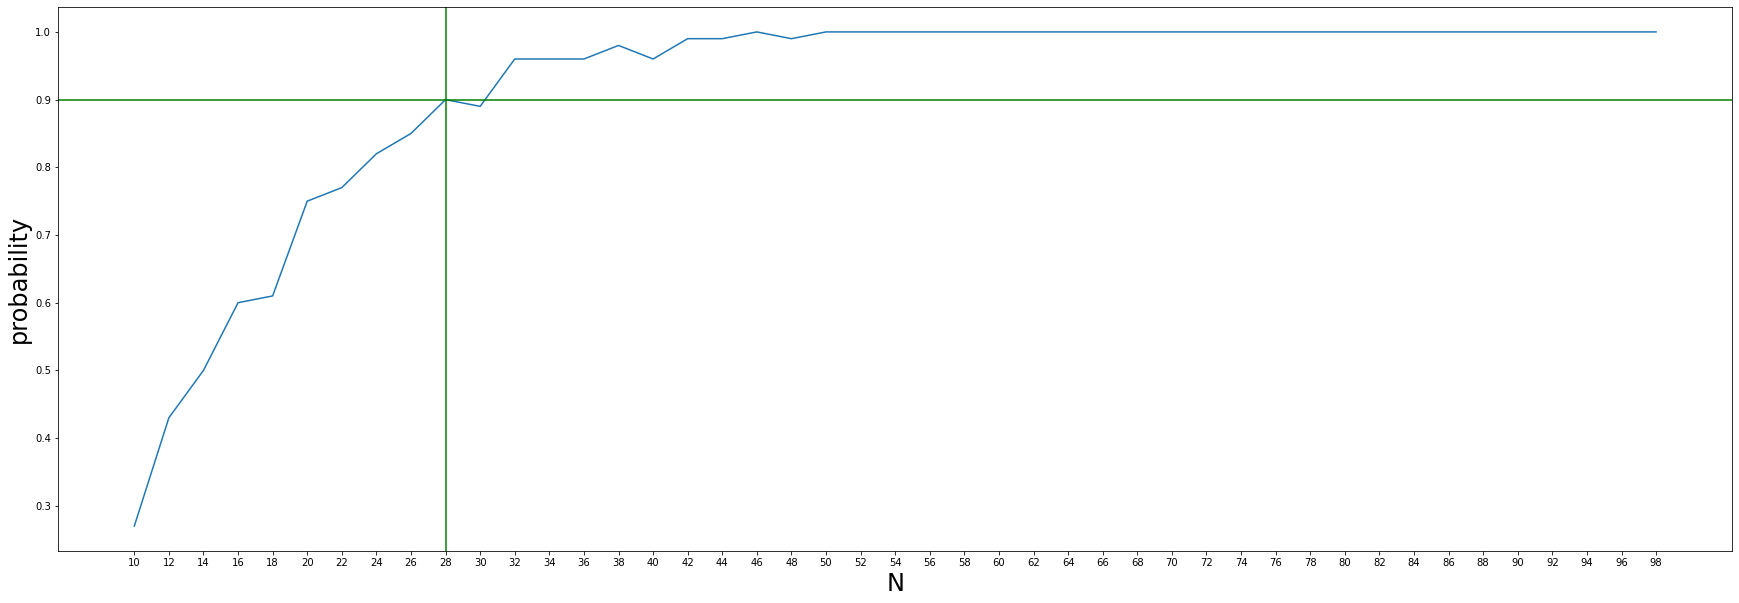

In [6]:
# plotting N on x axis and probability of significant difference on y axis
plt.plot(N_list,probability_list)
plt.xticks(N_list)
plt.rcParams["figure.figsize"] = (30,10)
plt.axhline(0.9, color='green', linestyle='solid')

# finding N where P is 0.9 or 90% for plotting the vertical line
for N, p in zip(N_list,probability_list):
    if p >= 0.9:
        vline = N
        break
plt.axvline(vline, color='green', linestyle='solid')
plt.xlabel('N',fontsize=24)
plt.ylabel('probability',fontsize=24)

In [7]:
# confirming that at N = 28 we get significant difference 90% of the time
N = 28
alpha = 0.05
number_of_permutations = 10**3
pvalue_list = []
for i in range(100):
    pvalue = main(N, number_of_permutations)
    pvalue_list.append(pvalue)
#print(pvalue_list)

# c is the number of times pvalue is less than alpha
c = len([p for p in pvalue_list if p < alpha])
print(f"We are getting a significant difference {c}% of times")

We are getting a significant difference 90% of times
